#[PANDASAI](https://github.com/gventuri/pandas-ai)& [LANGCHAIN](https://github.com/langchain-ai/langchain) : Chat with Data (CSV, Excel, Pandas df)

In this workshop, we learn how to develop the apps to Chat with Structured Data in the format of Pandas DataFrames. We cover the develoment of application using `pandasai` and `langchain` apis.

## Supported Models

The Pandasai API currently supports several models, and it is continuously being developed with the possibility of adding more models in the future. The supported models include:

1. ChatGPT by OpenAI
2. StarCoder by Huggingface
3. Azure ChatGPT API
4. OpenAI Assistant
5. Google PaLM
6. OSS Model by HF using TextGeneration API

These models can be utilized in a conversational form, allowing users to interact with them effectively.

To facilitate the usage of these models, this tutorial provides guidance on running them using Google Colab. Google Colab is a platform that enables straightforward onboarding and provides a Google Colab Notebook, which simplifies the process of getting started.

By leveraging the provided Google Colab Notebook, users can easily run the supported models within a conversational context, enhancing the overall interactive experience and enabling efficient data analysis.

Please note that as the Pandasai API evolves, additional models may be incorporated, expanding the range of options available to users.

## Learning Objectives:
This tutorial aims to help you achieve the following learning objectives:

1. Install the pandasai library.
2. Set up the API_TOKEN using either the OpenAI platform or the Hugging Face platform.
3. Explore and run basic functionalities provided by pandasai.
4. Execute examples using pandasai with predefined prompts for experimentation.
5. Chat with Pandas DataFrame using Pandasai & Langchain APIS

Please note that while the OpenAI platform is not free, it is still reasonably priced for running a few queries. On the other hand, the StartCoder model by Hugging Face is available for personal use at no cost.


## Prerequisites
Before proceeding with this tutorial, make sure you meet the following prerequisites:

1. Basic understanding of Python, Pandas, and APIs for generative models.
2. Obtain API tokens from the openai platform and/or Hugging Face, depending on the models you intend to use.
3. Demonstrated eagerness to learn and develop your skills.
4. Familiarisation with HuggingFace Hub

Having a foundational knowledge of Python, Pandas, and generative models APIs will be beneficial for understanding the concepts covered in this tutorial. Additionally, acquiring the necessary API tokens from the respective platforms will enable you to interact with the models effectively.

It's important to approach this tutorial with a positive attitude and a willingness to learn and improve your skills. Through active participation and a growth mindset, you will be able to make the most of this learning opportunity.

# Getting Started

Installing `Pandasai` is pretty striaght forward using `pip`. The recent releases are hosted on [Pnadasai Pypi](https://pypi.org/project/pandasai/) page. Always check the version, you are going to install. Make sure, check out the [Issues](https://github.com/gventuri/pandas-ai/issues) page of its GitHub Reporistry for any problems you face.  

In [ ]:
!pip install --upgrade pandas pandasai==1.5.11 loguru langchain -q

Now we import the dependencies:

## Generate OPENAI API Token

Users are required to generate `YOUR_API_TOKEN`. Follow below simple steps to generate your API_TOKEN with
[openai](https://platform.openai.com/overview).

1. Go to  https://openai.com/api/ and signup with your email address or connect your Google Account.
2. Go to View API Keys on left side of your Personal Account Settings
3. Select Create new Secret key

> The API access to openai is a paid service. You have to set up billing.
>Read the [Pricing](https://platform.openai.com/docs/quickstart/pricing) information before experimenting.

## Generate HUGGING FACE PLATFORM API Token

It will take around 2 mins to generate API token.

Users are required to generate `YOUR_API_TOKEN`. Follow below simple steps to generate your API_TOKEN with [Hugging Face](https://huggingface.co/).

1. Go to  https://huggingface.co/ and signup with your email address or connect your Google Account.
2. Go to https://huggingface.co/settings/tokens and generate User Access Token.
3. Copy and Save securely for Personal Use

> Hugging Face API keys are FREE for personal / educational use.

In [2]:
# Import basic libraries
import pandas as pd
import pandasai as pdai
from pandasai.llm.openai import OpenAI
from pandasai import SmartDataframe
from loguru import logger

print(f"Running pandasai version {pdai.__version__}")

Running pandasai version 1.5.11


In [ ]:
# Clear Cache
pdai.clear_cache()
!rm -r cache

# Using PANDASAI as Backend

With `pandasai`, users can use various LLM models to generate Python Code and Execute. In this section, we explore the available models implemneted in `pandasai` as well as using `LangChain` LLM models.


## OpenAI Model




In [3]:
import pandas as pd
from pandasai import SmartDataframe
from pandasai.helpers.openai_info import get_openai_callback
import pandasai as pdai
# Instantiate a LLM
from pandasai.llm import OpenAI

# Sample DataFrame
df = pd.DataFrame({
    "country": ["United States", "United Kingdom", "France", "Germany", "Italy", "Spain", "Canada", "Australia", "Japan", "China"],
    "gdp": [19294482071552, 2891615567872, 2411255037952, 3435817336832, 1745433788416, 1181205135360, 1607402389504, 1490967855104, 4380756541440, 14631844184064],
    "happiness_index": [6.94, 7.16, 6.66, 7.07, 6.38, 6.4, 7.23, 7.22, 5.87, 5.12]
})


# Enter API Key
OPENAI_API_KEY = '' #@param {type:"string"}

llm = OpenAI(api_token=OPENAI_API_KEY)

df = SmartDataframe(df, config={"llm": llm,
                                "enable_cache": False,
                                "conversational": False})
prompt = 'What are the top 5 happiest countries?'
response = df.chat(prompt)


In [ ]:
type(response)

pandasai.smart_dataframe.SmartDataframe

In [ ]:
response

,country,gdp,happiness_index
6,Canada,1607402389504,7.23
7,Australia,1490967855104,7.22
1,United Kingdom,2891615567872,7.16
3,Germany,3435817336832,7.07
0,United States,19294482071552,6.94


In [ ]:
print(response)

          country             gdp  happiness_index
6          Canada   1607402389504             7.23
7       Australia   1490967855104             7.22
1  United Kingdom   2891615567872             7.16
3         Germany   3435817336832             7.07
0   United States  19294482071552             6.94


In [ ]:
#using the callback to calculate the tokens and cost for each run
with get_openai_callback() as cb:
    response = df.chat("Calculate the sum of the gdp of north american countries")
    print(response)
    print(cb)

20901884461056
Tokens Used: 448
	Prompt Tokens: 242
	Completion Tokens: 206
Total Cost (USD): $ 0.000654


After loading the Dataframe and input of Prompt, now we are ready to run the Prompt with given dataframe and query. As a first setp, we instantiate the llm model with selected option. In order to understand, what is going under the hood, we set `verbose=True`. Let us run now!

As you can see from above experiments, having `verbose=True`, we can see the code generated by LLMs API and then this code is run to produce and answer on complete dataset.

## Play Around

Users can play around various questions about the tiny dataset we generated above. Using this notebook, you can select between Model Options and ask questions based on your problem.

## More Examples

In above section, we showed a little demo with small dataframe. Usually data is stored in `.csv` , .=`.xlsx` and other formats. `Pandasai` treats any data uploaded as Pandas dataframe and proceed accordingly.

In this section, we include some of the [examples](https://github.com/gventuri/pandas-ai/tree/main/examples) shipped with `pandasai` reporsitory.


In [ ]:
#Loading CSV file
import pandas as pd
from pandasai import PandasAI
from pandasai.llm.openai import OpenAI
file_path ='https://raw.githubusercontent.com/gventuri/pandas-ai/main/examples/data/Loan%20payments%20data.csv'
df = pd.read_csv(file_path)

In [ ]:
# Enter API Key
OPENAI_API_KEY = '' #@param {type:"string"}

llm = OpenAI(api_token=OPENAI_API_KEY)

df = SmartDataframe(df, config={"llm": llm,
                                "verbose": True,
                                "enable_cache": False,
                                "conversational": False})

In [ ]:
# Enter Prompt related to data or Select from Pre-defined for demo purposes.

prompt = 'Generate bar Plot of Loans Paid by Men & Women' #@param [ "How many loans are from Women that have been paid off?", "Generate bar Plot of Loans Paid by Men & Women"]  {allow-input: true}

<Figure size 1000x600 with 0 Axes>

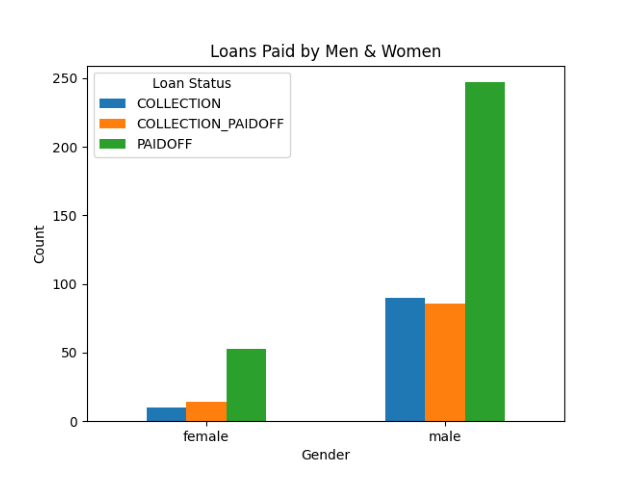

In [ ]:
response = df.chat(prompt)

In [ ]:
#Let us run the code ourselves and find out the results matches or not?
import pandas as pd
file_path ='https://raw.githubusercontent.com/gventuri/pandas-ai/main/examples/data/Loan%20payments%20data.csv'
df = pd.read_csv(file_path)
num_loans = len(df[(df['Gender'] == 'male') & (df['loan_status'] == 'PAIDOFF')]
    )
print(num_loans)

247


In [ ]:
import pandas as pd
file_path ='https://raw.githubusercontent.com/gventuri/pandas-ai/main/examples/data/Loan%20payments%20data.csv'
df = pd.read_csv(file_path)
num_loans = len(df[(df['Gender'] == 'female') & (df['loan_status'] == 'PAIDOFF')]
    )
print(num_loans)

53


The answers generated by Pandas AI and manually are same. However, it may not be a case always.


# Remarks
In this concise tutorial, we have explored the Pandasai Library and gained insight into its higher-level architecture. This library offers a convenient solution for individuals to inquire about their data without the need to train in-house Large Language Models (LLMs) on company data. While there are various potential applications for this tool, it's important to remain mindful that the generated code by LLMs may occasionally produce unexpected outputs.

It's worth emphasizing that Pandas AI is an actively developed project, indicating ongoing efforts to improve and enhance its functionality. With dedicated contributors, exciting features are being developed and added to this library.

> **Stay tuned! There's more to come in the world of Pandas AI as it evolves and continues to empower users in their data exploration and analysis endeavors.**


# LANGCHAIN: Chat with Data using `pandas-agent`

In this section, we explore, how can we chat with pandas DataFrame using `create_pandas_dataframe_agent` provided with `langchain` API. Once, code is ready, we can go and integrate the code in the App.

In [9]:
! pip install langchain-experimental -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.0/163.0 kB 3.4 MB/s eta 0:00:00


In [10]:
from langchain.agents import AgentType
from langchain_experimental.agents.agent_toolkits.pandas.base import create_pandas_dataframe_agent
from langchain.callbacks.streamlit import StreamlitCallbackHandler
from langchain.chat_models import ChatOpenAI

In [11]:
#Loading CSV file
import pandas as pd
file_path ='https://raw.githubusercontent.com/gventuri/pandas-ai/main/examples/data/Loan%20payments%20data.csv'
df = pd.read_csv(file_path)

In [12]:
df.head()

,Loan_ID,loan_status,Principal,terms,effective_date,due_date,paid_off_time,past_due_days,age,education,Gender
0,xqd20166231,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/14/2016 19:31,NaN,45,High School or Below,male
1,xqd20168902,PAIDOFF,1000,30,9/8/2016,10/7/2016,10/7/2016 9:00,NaN,50,Bechalor,female
2,xqd20160003,PAIDOFF,1000,30,9/8/2016,10/7/2016,9/25/2016 16:58,NaN,33,Bechalor,female
3,xqd20160004,PAIDOFF,1000,15,9/8/2016,9/22/2016,9/22/2016 20:00,NaN,27,college,male
4,xqd20160005,PAIDOFF,1000,30,9/9/2016,10/8/2016,9/23/2016 21:36,NaN,28,college,female


In [13]:
# Enter API Key
OPENAI_API_KEY = '' #@param {type:"string"}

In [14]:
llm = ChatOpenAI(
            temperature=0, model="gpt-3.5-turbo-0613", openai_api_key=OPENAI_API_KEY, streaming=True
        )

pandas_df_agent = create_pandas_dataframe_agent(
    llm,
    df,
    verbose=True,
    agent_type=AgentType.OPENAI_FUNCTIONS,
    handle_parsing_errors=True,
)

In [15]:
# Enter Prompt related to data or Select from Pre-defined for demo purposes.

prompt = 'How many loans are from Women that have been paid off?' #@param [ "How many loans are from Women that have been paid off?", "Generate bar Plot of Loans Paid by Men & Women"]  {allow-input: true}

In [16]:
response = pandas_df_agent.run(prompt)



> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': "df[(df['Gender'] == 'female') & (df['loan_status'] == 'PAIDOFF')].shape[0]"}`


53There are 53 loans from women that have been paid off.

> Finished chain.


In [17]:
response

'There are 53 loans from women that have been paid off.'

#Conclusions

In this short course / workshop, we have learned how to chat with Pandas DataFrames using Pandasai and LagChain APIs. Both of these APIs support wide range of models. Pandasai is specifically designed to interact with tabular data.

# Next Steps

Nest step is to develop a Streamlit App to interact with Data and Wrap the App with Docker. We will cover two ways to deploy the app.
